

# Project: Investigate a Dataset - (TMDb Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> I will be investigating the TMDb Movie Dataset which contains about 10 000 movies. I will be determining the popularity of genres thorughout the years, how vote count affcet ratings, in what year the most movies were released and what weere the most popular movies.


### Question(s) for Analysis
> 1. What are the most popular genres through each year?

> 2. Is a good rating directly affected and determined by having a higher vote count?

> 3. Which year released the most movies?

> 4. What were the most popular movie?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Read the data
df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

# df.shape

In [4]:
# read the last 5 rows
df.tail(5)

id    imdb_id  popularity  budget  revenue  \
10861     21  tt0060371    0.080598       0        0   
10862  20379  tt0060472    0.065543       0        0   
10863  39768  tt0060161    0.065141       0        0   
10864  21449  tt0061177    0.064317       0        0   
10865  22293  tt0060666    0.035919   19000        0   

                 original_title  \
10861        The Endless Summer   
10862                Grand Prix   
10863       Beregis Avtomobilya   
10864    What's Up, Tiger Lily?   
10865  Manos: The Hands of Fate   

                                                    cast homepage  \
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...      NaN   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...      NaN   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      NaN   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...      NaN   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...      NaN   

                 director                                            tagline  \
10861         Bruce Brown                                                NaN   
10862  John Frankenheimer  Cinerama sweeps YOU into a drama of speed and ...   
10863      Eldar Ryazanov                                                NaN   
10864         Woody Allen                          WOODY ALLEN STRIKES BACK!   
10865    Harold P. Warren       It's Shocking! It's Beyond Your Imagination!   

       ...                                           overview runtime  \
10861  ...  The Endless Summer, by Bruce Brown, is one of ...      95   
10862  ...  Grand Prix driver Pete Aron is fired by his te...     176   
10863  ...  An insurance agent who moonlights as a carthie...      94   
10864  ...  In comic Woody Allen's film debut, he took the...      80   
10865  ...  A family gets lost on the road and stumbles up...      74   

                       genres  \
10861             Documentary   
10862  Action|Adventure|Drama   
10863          Mystery|Comedy   
10864           Action|Comedy   
10865                  Horror   

                                    production_companies release_date  \
10861                                  Bruce Brown Films      6/15/66   
10862  Cherokee Productions|Joel Productions|Douglas ...     12/21/66   
10863                                            Mosfilm       1/1/66   
10864                            Benedict Pictures Corp.      11/2/66   
10865                                          Norm-Iris     11/15/66   

      vote_count  vote_average  release_year     budget_adj  revenue_adj  
10861         11           7.4          1966       0.000000          0.0  
10862         20           5.7          1966       0.000000          0.0  
10863         11           6.5          1966       0.000000          0.0  
10864         22           5.4          1966       0.000000          0.0  
10865         15           1.5          1966  127642.279154          0.0  

[5 rows x 21 columns]

In [5]:
df.shape

(10866, 21)

In [6]:
# summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# convert scientific numbers to integers
# source: https://stackoverflow.com/questions/32861429/converting-number-in-scientific-notation-to-int
pd.options.display.float_format = '{:.2f}'.format

Visualize the data

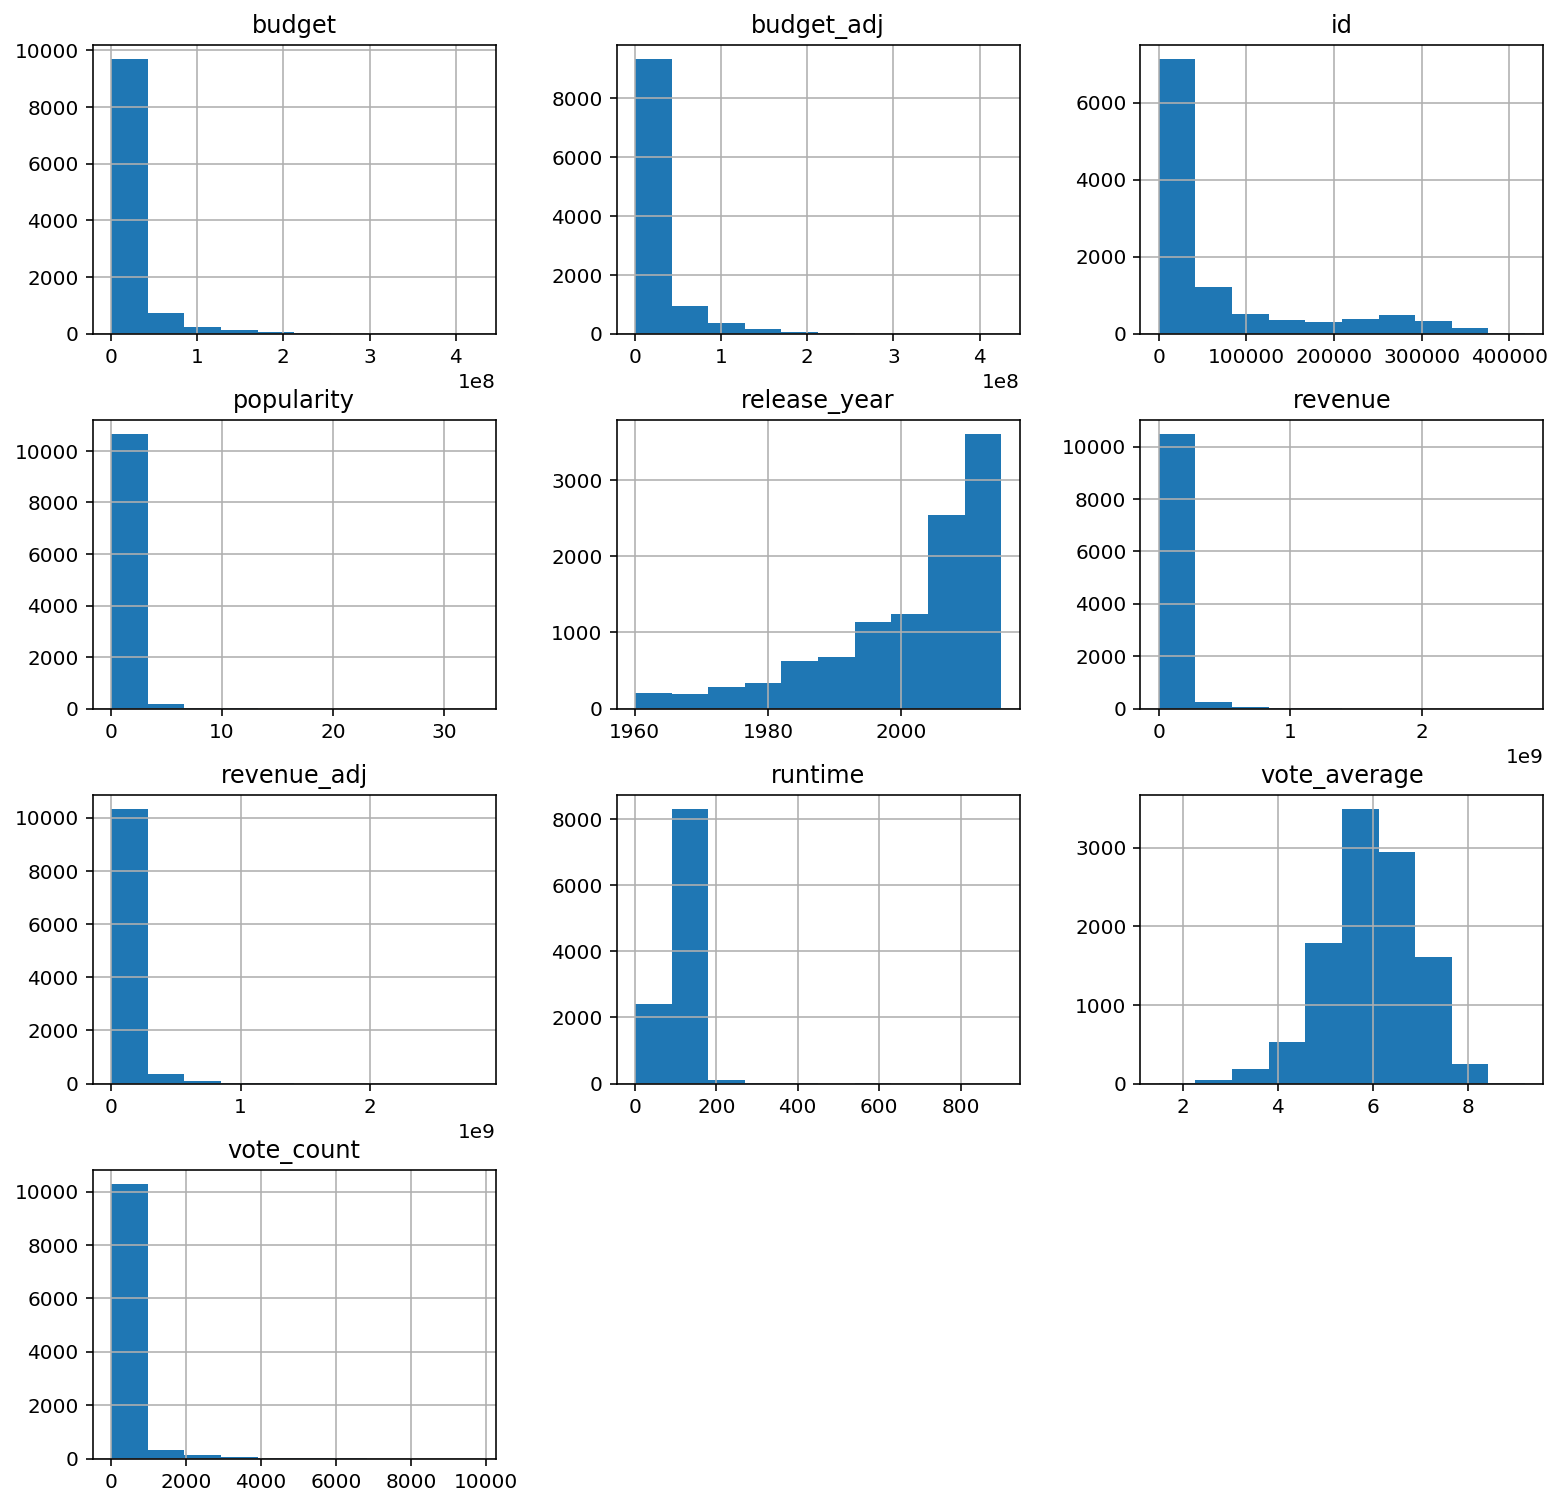

In [8]:
df.hist(figsize=(13,13));

In [9]:
df.describe()

id  popularity       budget       revenue  runtime  vote_count  \
count  10866.00    10866.00     10866.00      10866.00 10866.00    10866.00   
mean   66064.18        0.65  14625701.09   39823319.79   102.07      217.39   
std    92130.14        1.00  30913213.83  117003486.58    31.38      575.62   
min        5.00        0.00         0.00          0.00     0.00       10.00   
25%    10596.25        0.21         0.00          0.00    90.00       17.00   
50%    20669.00        0.38         0.00          0.00    99.00       38.00   
75%    75610.00        0.71  15000000.00   24000000.00   111.00      145.75   
max   417859.00       32.99 425000000.00 2781505847.00   900.00     9767.00   

       vote_average  release_year   budget_adj   revenue_adj  
count      10866.00      10866.00     10866.00      10866.00  
mean           5.97       2001.32  17551039.82   51364363.25  
std            0.94         12.81  34306155.72  144632485.04  
min            1.50       1960.00         0.00          0.00  
25%            5.40       1995.00         0.00          0.00  
50%            6.00       2006.00         0.00          0.00  
75%            6.60       2011.00  20853251.08   33697095.72  
max            9.20       2015.00 425000000.00 2827123750.41


### Data Cleaning
> Cleaning my data to ensure maximum accurate results.
 

In [10]:
# drop unnescary labels
df.drop(labels = ['imdb_id', 'homepage', 'budget_adj', 'revenue_adj'], axis =1, inplace =True)

In [11]:
df.shape

(10866, 17)

There are now 10866 rows and 17 columns

In [12]:
# how many duplicates are there
sum(df.duplicated())

1

In [13]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [14]:
df.dropna(inplace = True)

In [15]:
df.isnull().sum().any()

False

In [16]:

df['revenue'].replace(0, np.NAN, inplace = True)
df['budget'].replace(0, np.NAN, inplace = True)
df['runtime'].replace(0, np.NAN, inplace = True)

df.dropna(axis = 0, inplace = True)

In [17]:
df.shape

(3446, 17)

There are 3446 rows and 17 columns

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3446 entries, 0 to 10848
Data columns (total 17 columns):
id                      3446 non-null int64
popularity              3446 non-null float64
budget                  3446 non-null float64
revenue                 3446 non-null float64
original_title          3446 non-null object
cast                    3446 non-null object
director                3446 non-null object
tagline                 3446 non-null object
keywords                3446 non-null object
overview                3446 non-null object
runtime                 3446 non-null float64
genres                  3446 non-null object
production_companies    3446 non-null object
release_date            3446 non-null object
vote_count              3446 non-null int64
vote_average            3446 non-null float64
release_year            3446 non-null int64
dtypes: float64(5), int64(3), object(9)
memory usage: 484.6+ KB


In [19]:
# convert integer
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes

id                               int64
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [20]:
df.shape

(3446, 17)

In [21]:
# source: https://www.geeksforgeeks.org/python-pandas-series-str-slice/
# seperate the columns that are seperated by "|" into columns.
df_c = (df['cast'].str.split('|', expand = True).rename(columns = lambda x: f"cast_{x+1}"))
df_d = (df['director'].str.split('|', expand = True).rename(columns = lambda x: f"director_{x+1}"))
df_k = (df['keywords'].str.split('|', expand = True).rename(columns = lambda x: f"keywords_{x+1}"))
df_g = (df['genres'].str.split('|', expand = True).rename(columns = lambda x: f"genres_{x+1}"))
df_p = (df['production_companies'].str.split('|', expand = True).rename(columns = lambda x: f"production_companies_{x+1}"))

df_p.head()


production_companies_1      production_companies_2  \
0          Universal Studios        Amblin Entertainment   
1  Village Roadshow Pictures  Kennedy Miller Productions   
2       Summit Entertainment            Mandeville Films   
3                  Lucasfilm       Truenorth Productions   
4         Universal Pictures               Original Film   

    production_companies_3   production_companies_4 production_companies_5  
0       Legendary Pictures  Fuji Television Network                 Dentsu  
1                     None                     None                   None  
2  Red Wagon Entertainment                  NeoReel                   None  
3                Bad Robot                     None                   None  
4     Media Rights Capital                   Dentsu         One Race Films

In [22]:
df.shape

(3446, 17)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What are the most popular genres through each year?)

In [23]:
# seperate the columns that are seperated by "|" into columns.
df_c = (df['cast'].str.split('|', expand = True).rename(columns = lambda x: f"cast_{x+1}"))
df_d = (df['director'].str.split('|', expand = True).rename(columns = lambda x: f"director_{x+1}"))
df_k = (df['keywords'].str.split('|', expand = True).rename(columns = lambda x: f"keywords_{x+1}"))
df_g = (df['genres'].str.split('|', expand = True).rename(columns = lambda x: f"genres_{x+1}"))
df_p = (df['production_companies'].str.split('|', expand = True).rename(columns = lambda x: f"production_companies_{x+1}"))

df_p.head()

production_companies_1      production_companies_2  \
0          Universal Studios        Amblin Entertainment   
1  Village Roadshow Pictures  Kennedy Miller Productions   
2       Summit Entertainment            Mandeville Films   
3                  Lucasfilm       Truenorth Productions   
4         Universal Pictures               Original Film   

    production_companies_3   production_companies_4 production_companies_5  
0       Legendary Pictures  Fuji Television Network                 Dentsu  
1                     None                     None                   None  
2  Red Wagon Entertainment                  NeoReel                   None  
3                Bad Robot                     None                   None  
4     Media Rights Capital                   Dentsu         One Race Films

In [24]:
def divide(col_name):
    divide = df[col_name].str.cat(sep = '|')
    divide = pd.Series(divide.split('|'))
    frequency = divide.value_counts(ascending = False)
    return frequency

In [25]:
# Display all the different genres
genres = divide('genres')
genres

Drama              1516
Comedy             1199
Thriller           1113
Action             1014
Adventure           698
Crime               594
Romance             566
Science Fiction     498
Horror              436
Family              387
Fantasy             371
Mystery             323
Animation           185
History             112
Music               109
War                 107
Western              48
Documentary          23
Foreign               6
TV Movie              1
dtype: int64

Text(0,0.5,'How often an apperance was made')

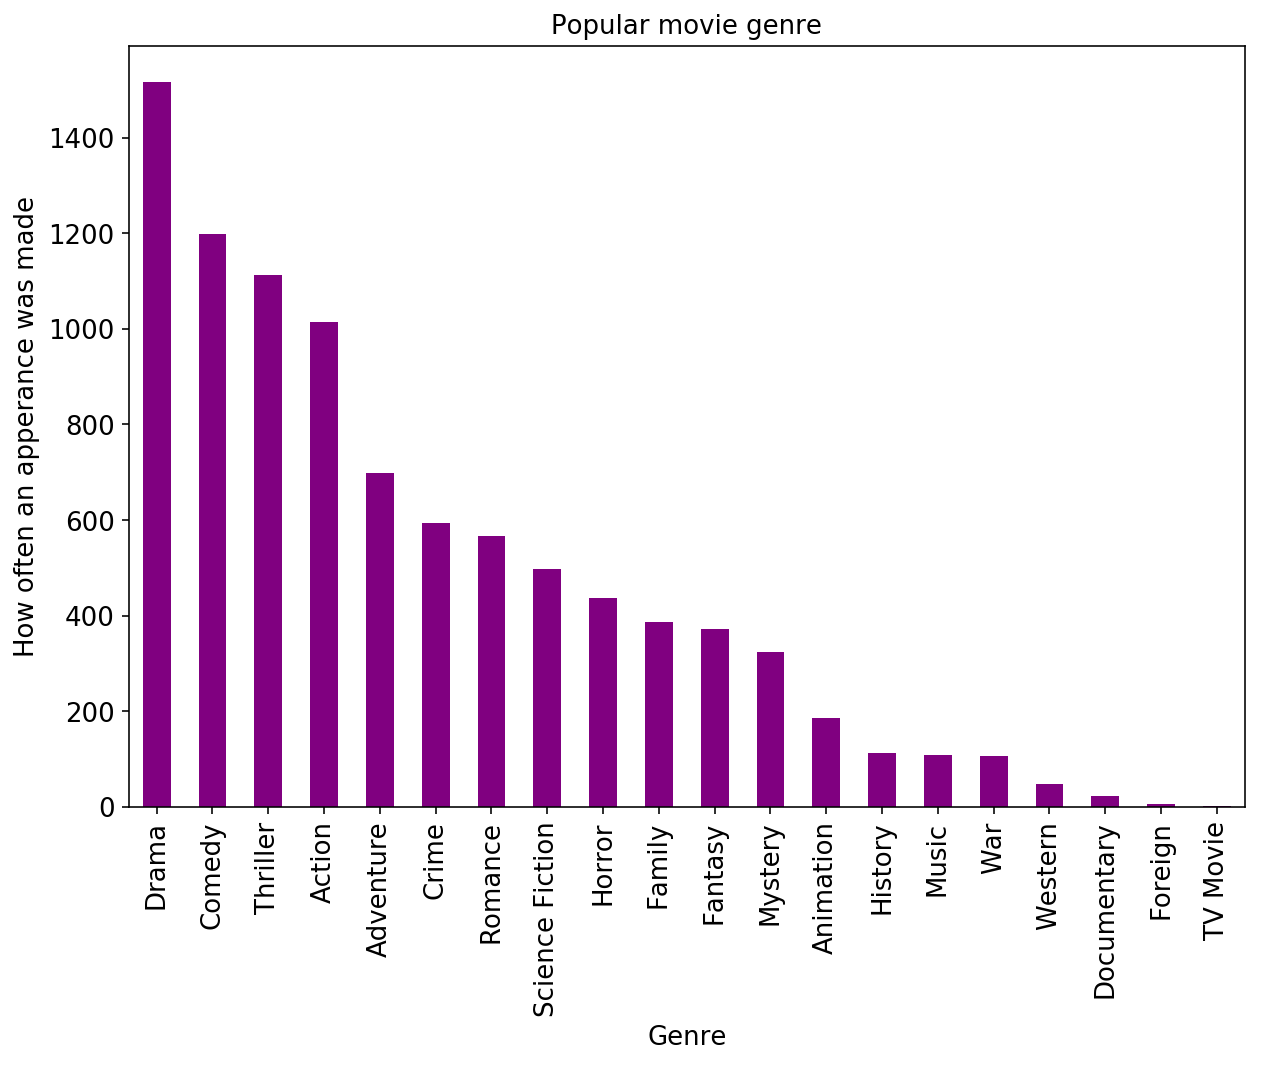

In [26]:
g_bar = genres.plot.bar(color = 'purple', fontsize = 13)
g_bar.figure.set_size_inches(10,7);
plt.title('Popular movie genre', color = 'black', fontsize ='13')
plt.xlabel('Genre', color = 'black', fontsize = '13' )
plt.ylabel('How often an apperance was made', color = 'black', fontsize = '13' )

Due to the above graph, we are able to see that Drama is the most popular genre with the comedy genre as the second most popular genre. The least popular genres were documentries, foreign and TV movie genre. We can also see that Actons, Thrillers and Comedies are almsot as popular as comedies.

### Research Question 2  (Is a good rating directly affected and determined by  having a higher vote count?)

In [27]:
# sliced dataframe and compare those votes that are more than 2000
df_vote = df.loc[:, 'vote_count' : 'vote_average'] 
df_vote_2000 = df_vote[df_vote['vote_count'] >2000]

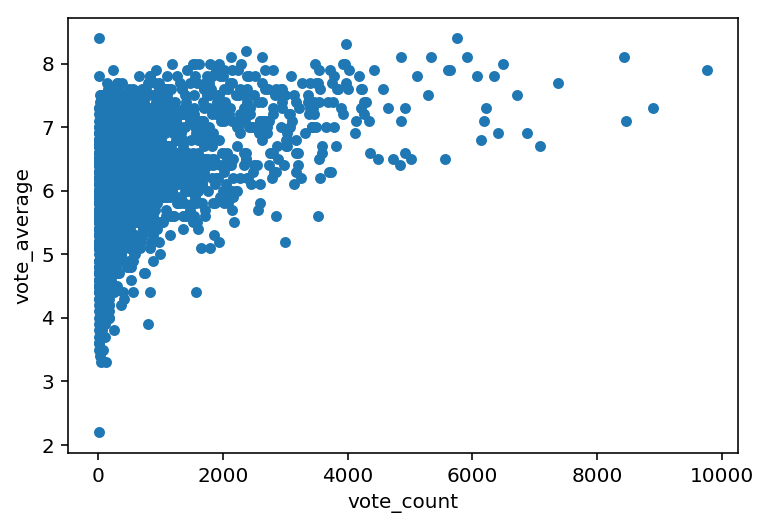

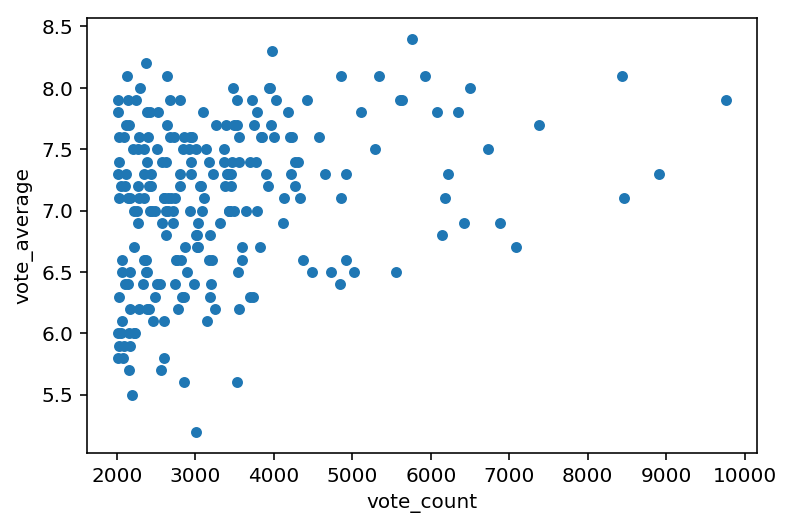

In [28]:
df_vote.plot(x='vote_count', y='vote_average', kind='scatter');
df_vote_2000.plot(x='vote_count', y='vote_average', kind='scatter');

In [29]:
df_vote.corr()

vote_count  vote_average
vote_count          1.00          0.40
vote_average        0.40          1.00

In [30]:
df_vote_2000.corr()

vote_count  vote_average
vote_count          1.00          0.29
vote_average        0.29          1.00

The above scatterplots allow us to see that a good movie rating is not directly affected and determined if there is a higher vote count.

### Research Question 3  (Which year released the most movies?)

In [31]:
year_movie = df.groupby('release_year')['original_title'].count()
year_movie.head()

release_year
1960    4
1961    9
1962    7
1963    6
1964    7
Name: original_title, dtype: int64

In [32]:
year_movie.idxmax()

2011

In [33]:
year_movie[2011]

178

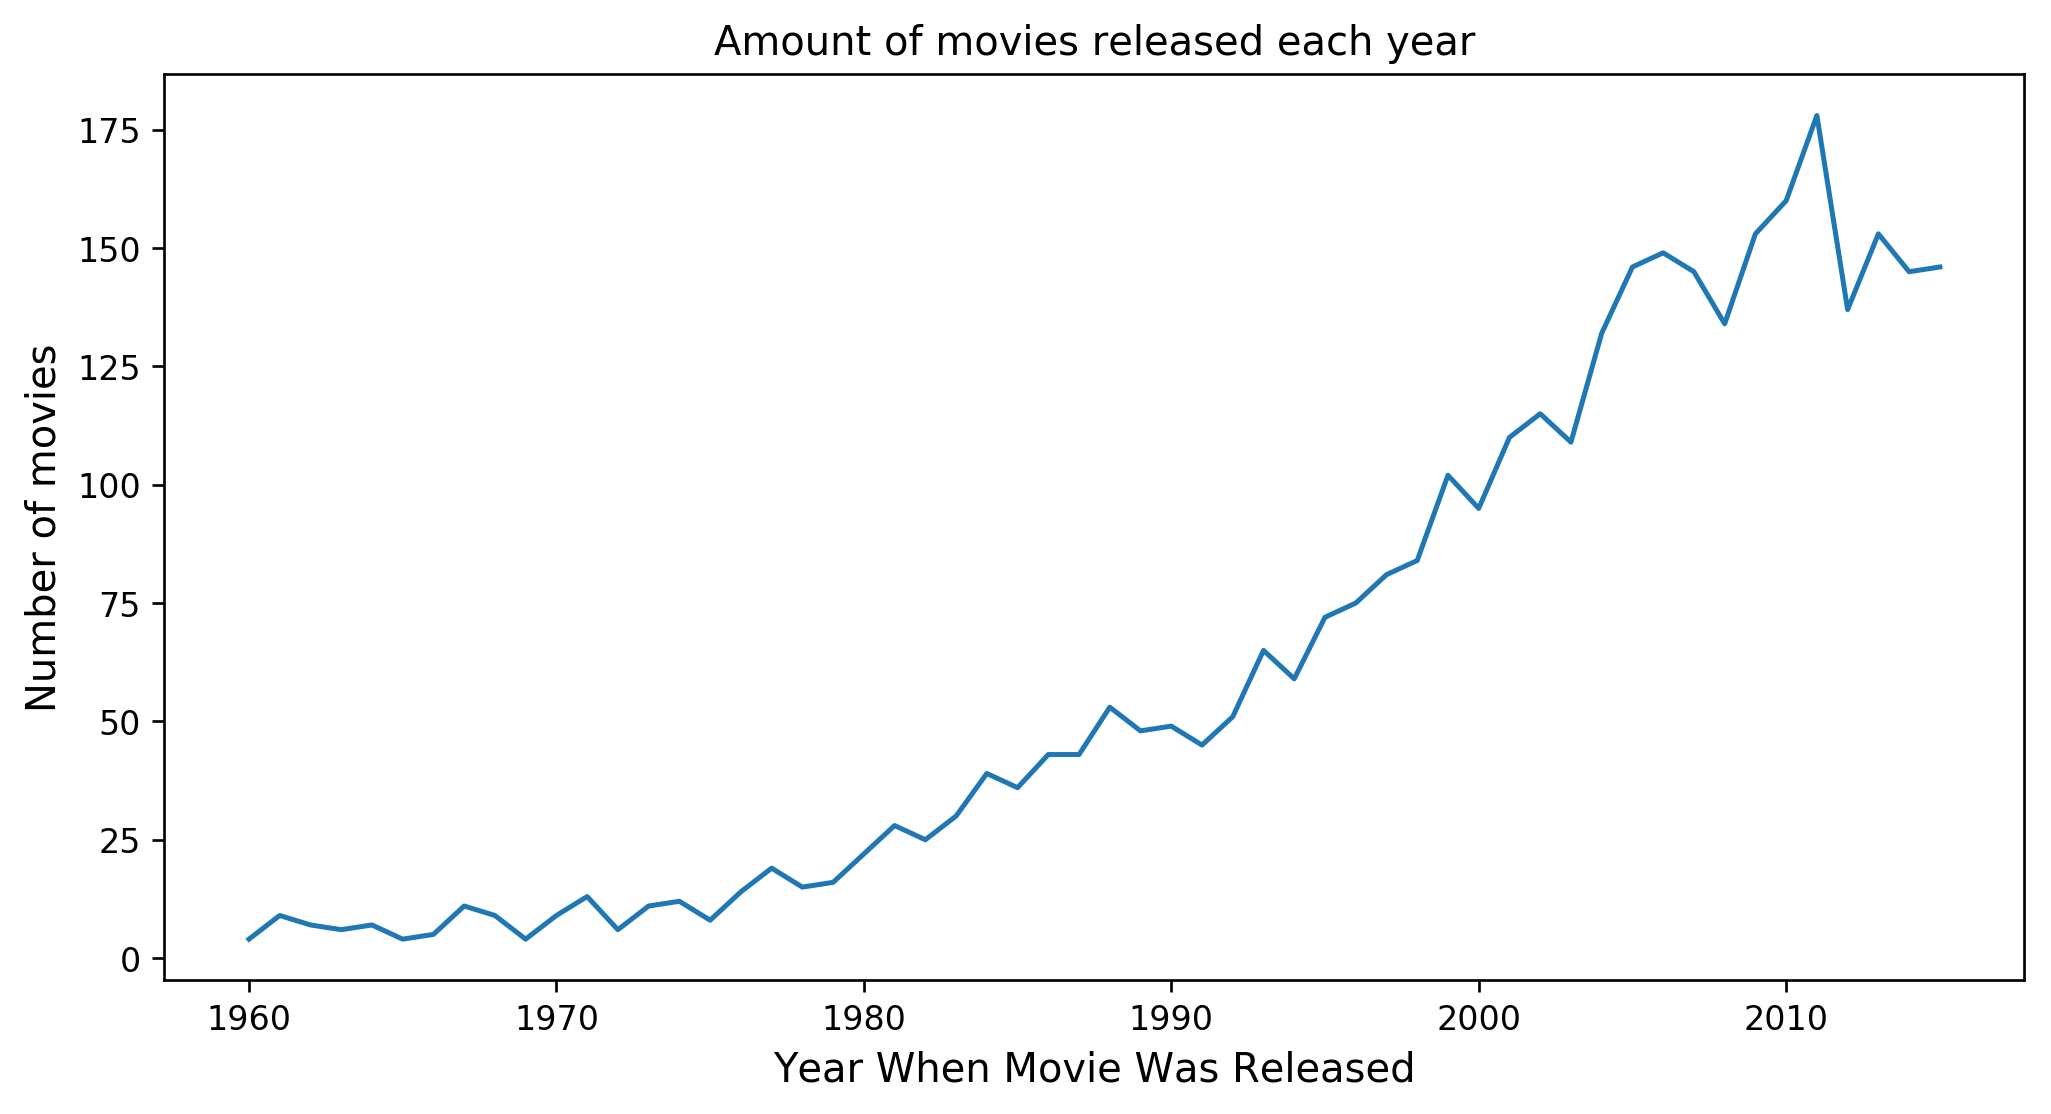

In [34]:
plt.figure(figsize = (10,5), dpi = 120)
plt.xlabel('Year When Movie Was Released', fontsize = 12)
plt.ylabel('Number of movies', fontsize = 12)
plt.title('Amount of movies released each year', fontsize = 12)

plt.plot(year_movie)
plt.show()

In the above diagram, it is made clear to us that the most movies were released in 2015 and the least number of movies were released in 1960. We can also see that each year, more movies are slowly but surely being released.

### Research Question 4 (What are the most popular movies?)

In [35]:
df_popularity = df.groupby('original_title')['popularity'].sum()
top10_mp = df_popularity.nlargest(10)
top10_mp

original_title
Jurassic World                          32.99
Mad Max: Fury Road                      28.42
Interstellar                            24.95
Guardians of the Galaxy                 14.31
Insurgent                               13.11
Captain America: The Winter Soldier     12.97
Star Wars                               12.04
John Wick                               11.42
Star Wars: The Force Awakens            11.17
The Hunger Games: Mockingjay - Part 1   10.74
Name: popularity, dtype: float64

The data above shows that the most popluar movie is Jurassic World with Mad Max being second. The least popular movies is John Wick, Star Wars: The Force Awakens and lastly The Hunger Games(Part1).

<a id='conclusions'></a>
## Conclusions

> I have come to the following conclusions for my questions for this investigation.

> 1. What are the most popular genres?
> After analysing the graph, it became clear that Drama was the most popular genre, with Comedy as the second most popular genre. We were also able to determine that, there are not many people interested in TV Movie, Foreign, Documentry and Western genres. 

> 2. Is a good rating directly affected and determined by having a higher vote count?
> It is dificult to say if those with a higher vote count were affected by getting a good rating.

> 3. Which year released the most movies?
> The most movies were released in 2015 and the least amount of movies were released in 1960. There is a coomon trend of the the data points increasing gradually, this means that each year, more and more movies and released.

> 4. What is the most popular movies?
> The most popular movie is Jurrasic World and Mad Max: Fury Road. The least popular movies are the Hunger Games.

## Limitations:
> No advanced statistics were made on the data set and all the results are limited to the data set. There were also quite a few entries that needed to be removed due to some missing data.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0